In [1]:
#import WHO dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress


WHO_df = pd.read_csv('WHO_Data/WHOMortalityDatabase_Map_a. Malignant skin melanoma_19th December 2023 23 17.csv', skiprows = 5, index_col=False)
# headers = ["Region Code", "Region Name", "Country Code", "Country Name", "Year", "Sex", "Age group code", "Age Group", "Number", "Percentage of cause-specific deaths out of total deaths", 
#            "Age-standardized death rate per 100 000 standard population", "Death rate per 100 000 population"]
WHO_df.head()

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
0,EU,Europe,ALB,Albania,1987,All,Age_all,[All],22.0,0.126977,1.036609,0.715191
1,EU,Europe,ALB,Albania,1987,All,Age00,[0],0.0,0.000000,NaN,0.000000
2,EU,Europe,ALB,Albania,1987,All,Age01_04,[1-4],0.0,0.000000,NaN,0.000000
3,EU,Europe,ALB,Albania,1987,All,Age05_09,[5-9],0.0,0.000000,NaN,0.000000
4,EU,Europe,ALB,Albania,1987,All,Age10_14,[10-14],0.0,0.000000,NaN,0.000000


In [2]:
WHO_df.columns

Index(['Region Code', 'Region Name', 'Country Code', 'Country Name', 'Year',
       'Sex', 'Age group code', 'Age Group', 'Number',
       'Percentage of cause-specific deaths out of total deaths',
       'Age-standardized death rate per 100 000 standard population',
       'Death rate per 100 000 population'],
      dtype='object')

In [3]:
#data type for each column
WHO_df.dtypes

Region Code                                                     object
Region Name                                                     object
Country Code                                                    object
Country Name                                                    object
Year                                                             int64
Sex                                                             object
Age group code                                                  object
Age Group                                                       object
Number                                                         float64
Percentage of cause-specific deaths out of total deaths        float64
Age-standardized death rate per 100 000 standard population    float64
Death rate per 100 000 population                              float64
dtype: object

In [4]:
#list columns with null values
WHO_df.columns[WHO_df.isna().any()].tolist()

['Number',
 'Percentage of cause-specific deaths out of total deaths',
 'Age-standardized death rate per 100 000 standard population',
 'Death rate per 100 000 population']

In [5]:
WHO_df = WHO_df[WHO_df['Age group code'] != 'Age_all']

WHO_df = WHO_df[WHO_df['Age Group'] != '[Unknown]']

WHO_df = WHO_df[WHO_df['Age Group'] != '[5-9]']

WHO_df = WHO_df[WHO_df['Sex'] != 'All']



Aus = WHO_df[WHO_df['Country Name'] == 'Australia']

Aus

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
4117,OA,Oceania,AUS,Australia,1979,Male,Age00,[0],0.0,0.000000,NaN,0.000000
4118,OA,Oceania,AUS,Australia,1979,Male,Age01_04,[1-4],0.0,0.000000,NaN,0.000000
4120,OA,Oceania,AUS,Australia,1979,Male,Age10_14,[10-14],0.0,0.000000,NaN,0.000000
4121,OA,Oceania,AUS,Australia,1979,Male,Age15_19,[15-19],1.0,0.114155,NaN,0.149499
4122,OA,Oceania,AUS,Australia,1979,Male,Age20_24,[20-24],3.0,0.280899,NaN,0.482393
...,...,...,...,...,...,...,...,...,...,...,...,...
149934,OA,Oceania,AUS,Australia,2015,Female,Age65_69,[65-69],47.0,1.120114,NaN,8.059704
149935,OA,Oceania,AUS,Australia,2015,Female,Age70_74,[70-74],57.0,1.070624,NaN,13.132460
149936,OA,Oceania,AUS,Australia,2015,Female,Age75_79,[75-79],52.0,0.695280,NaN,15.641638
149937,OA,Oceania,AUS,Australia,2015,Female,Age80_84,[80-84],61.0,0.556569,NaN,24.368711


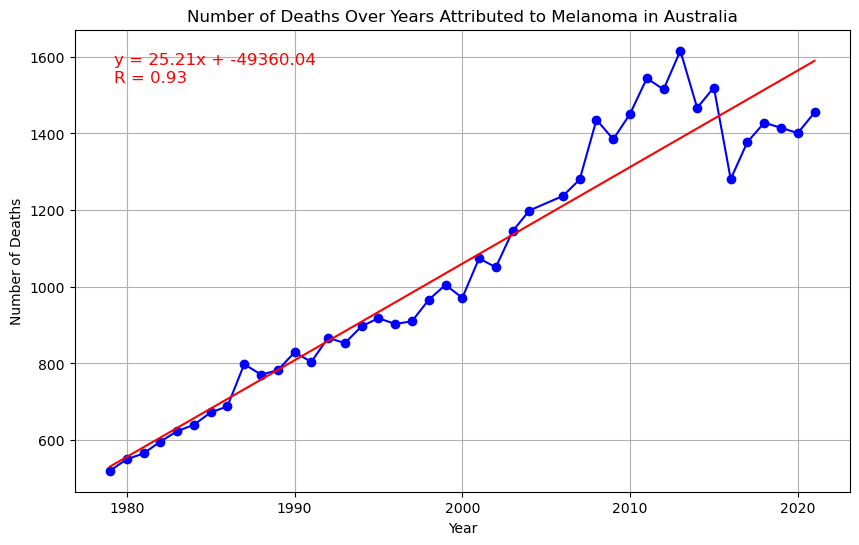

In [6]:
df = pd.DataFrame(Aus)

grouped_data = df.groupby('Year')['Number'].sum()

# Linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(grouped_data.index, grouped_data.values)

plt.figure(figsize=(10, 6))

plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b', label='Data Points')

regress_values = slope * grouped_data.index + intercept
plt.plot(grouped_data.index, regress_values, color='r', label='Regression Line')

equation = f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value**2:.2f}'  # R-squared value
plt.annotate(equation, xy=(grouped_data.index.min(), regress_values.min()), xytext=(0.05, 0.95),
             textcoords='axes fraction', fontsize=12, color='r', ha='left', va='top')

plt.title('Number of Deaths Over Years Attributed to Melanoma in Australia')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)

# Show plot
plt.show()

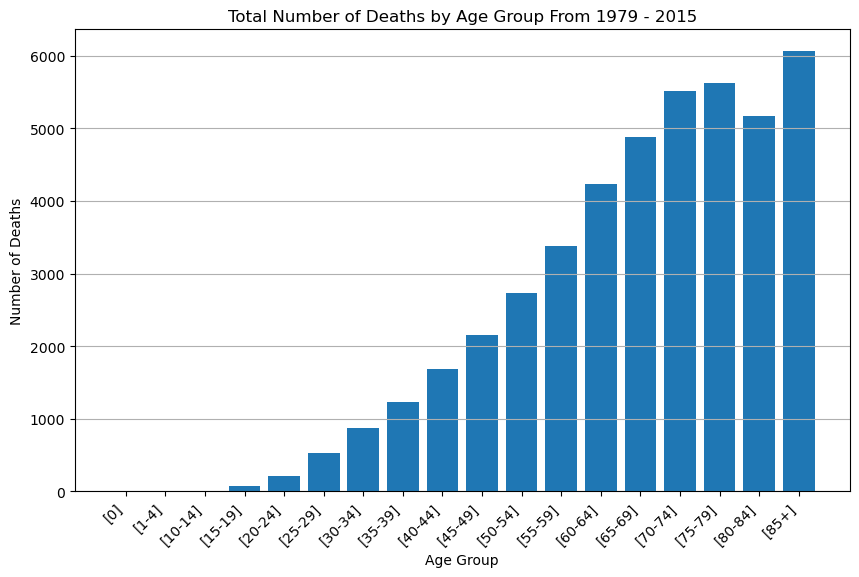

In [8]:
df = pd.DataFrame(Aus)

# Group by Age Group and calculate the sum of Number for each group
grouped_data = df.groupby('Age Group')['Number'].sum().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Age Group'], grouped_data['Number'])
plt.title('Total Number of Deaths by Age Group From 1979 - 2015')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Show plot
plt.show()